In [ ]:
import pandas as pd
import numpy as np


In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils import class_weight
import tensorflow as tf

In [ ]:
df = pd.read_csv("/content/Breast_Cancer SAN J.csv",header = 0)
df.head()

,Age,Marital Status,T Stage,N Stage,6th Stage,Grade,Estrogen Status,Progesterone Status,Status
0,68,1,1,1,2,3,1,1,1
1,50,1,2,2,1,2,1,1,1
2,58,3,3,3,4,2,1,1,1
3,58,1,1,1,2,3,1,1,1
4,47,1,1,1,3,3,1,1,1


In [ ]:
df.shape

(4024, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Age                  4024 non-null   int64
 1   Marital Status       4024 non-null   int64
 2   T Stage              4024 non-null   int64
 3   N Stage              4024 non-null   int64
 4   6th Stage            4024 non-null   int64
 5   Grade                4024 non-null   int64
 6   Estrogen Status      4024 non-null   int64
 7   Progesterone Status  4024 non-null   int64
 8   Status               4024 non-null   int64
dtypes: int64(9)
memory usage: 283.1 KB


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,4024.0,53.972167,8.963134,30.0,47.0,54.0,61.0,69.0
Marital Status,4024.0,0.614314,0.981486,0.0,0.0,0.0,1.0,4.0
T Stage,4024.0,1.784543,0.765623,1.0,1.0,2.0,2.0,4.0
N Stage,4024.0,0.438370,0.693479,0.0,0.0,0.0,1.0,2.0
6th Stage,4024.0,1.287773,0.997481,0.0,0.0,1.0,2.0,3.0
Grade,4024.0,1.150596,0.638234,0.0,1.0,1.0,2.0,3.0
Estrogen Status,4024.0,0.933151,0.249791,0.0,1.0,1.0,1.0,1.0
Progesterone Status,4024.0,0.826541,0.378691,0.0,1.0,1.0,1.0,1.0
Status,4024.0,0.846918,0.360111,0.0,1.0,1.0,1.0,1.0


In [ ]:
df.head()

,Age,Marital Status,T Stage,N Stage,6th Stage,Grade,Estrogen Status,Progesterone Status,Status
0,68,0,1,0,1,2,1,1,1
1,50,0,2,1,0,1,1,1,1
2,58,2,3,2,3,1,1,1,1
3,58,0,1,0,1,2,1,1,1
4,47,0,1,0,2,2,1,1,1


In [ ]:
dataset = pd.get_dummies(df)

In [ ]:
dataset.isna().sum()

Age                    0
Marital Status         0
T Stage                0
N Stage                0
6th Stage              0
Grade                  0
Estrogen Status        0
Progesterone Status    0
Status                 0
dtype: int64

In [ ]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)
print(train_dataset)
print(test_dataset)

      Age  Marital Status  T Stage   N Stage  6th Stage  Grade  \
1493   58               0         4        1          3      2   
2588   59               0         2        0          2      2   
891    49               0         3        1          0      1   
1952   42               0         2        1          0      1   
87     52               0         3        0          0      1   
...   ...             ...       ...      ...        ...    ...   
622    49               1         1        0          1      1   
3636   56               2         1        1          0      1   
409    69               2         2        0          2      1   
2684   49               3         3        0          0      1   
1623   69               2         4        1          3      0   

      Estrogen Status  Progesterone Status  Status  
1493                1                    1       1  
2588                1                    1       1  
891                 1                    1      

In [ ]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('Status')
test_labels = test_features.pop('Status')

In [ ]:
print("[INFO] Class weighting...")
class_weights = class_weight.compute_class_weight(
                                                  'balanced',
                                                  classes=np.unique(np.ravel(train_labels, order='C')),
                                                  y=np.ravel(train_labels, order='C'))

class_weight_dict = dict(enumerate(class_weights))
print(class_weight_dict)

[INFO] Class weighting...
{0: 3.238430583501006, 1: 0.5912931667891257}


In [ ]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))
print(normalizer.mean.numpy())

[[53.865795    0.6293882   1.7971414   0.4392669   1.2858031   1.1503572
   0.93414104  0.8254116 ]]


In [ ]:
def plot_cm(labels, predictions, p=0.5):
    cm = confusion_matrix(labels, predictions > p)
    plt.figure(figsize=(8,8))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title('Confusion matrix')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

    print(f'Actual is 0 and Prediction is 0: ', cm[0][0])
    print(f'Actual is 0 and Prediction is 1: ', cm[0][1])
    print(f'Actual is 1 and Prediction is 0: ', cm[1][0])
    print(f'Actual is 1 and Prediction is 1: ', cm[1][1])
    print(f'Total Correct Prediction: {np.sum(cm[0][0] + cm[1][1])} / {np.sum(cm)}')

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras import Sequential, layers, losses
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow.keras.optimizers import Adam
device_name = tf.test.gpu_device_name()
if "GPU" not in device_name:
    print("GPU device not found")
print('Found GPU at: {}'.format(device_name))

GPU device not found
Found GPU at: 


In [ ]:
model = Sequential([
      #normalizer,
      layers.Dense(256, activation='relu', kernel_initializer='he_normal'),
      layers.Dropout(0.2),
      layers.Dense(128),
      layers.Dense(1, activation='sigmoid')])

In [ ]:
# es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20, restore_best_weights=True)
es = EarlyStopping(monitor='val_accuracy', verbose=1, patience=20, mode='max', restore_best_weights=True)

LR = 1e-4
EPOCHS = 100
optim = Adam(learning_rate=LR, decay=LR / EPOCHS)

model.compile(optimizer=optim, 
              loss=losses.binary_crossentropy, metrics=['accuracy'])

In [ ]:
%%time
history = model.fit(
    train_features,
    train_labels,
    epochs=EPOCHS,
    verbose=0,
    validation_split = 0.2,
    callbacks=[es],
    class_weight=class_weight_dict)

Restoring model weights from the end of the best epoch: 15.
Epoch 35: early stopping
CPU times: user 13.2 s, sys: 769 ms, total: 13.9 s
Wall time: 12.7 s


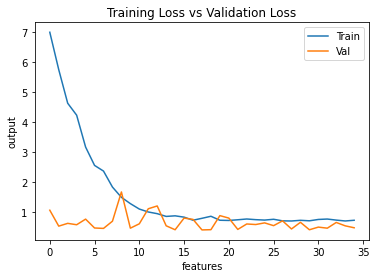

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss vs Validation Loss')
plt.xlabel('features')
plt.ylabel('output')
plt.legend(['Train','Val'])

In [ ]:
print("[INFO] Calculating model accuracy")
train_scores = model.evaluate(train_features, train_labels)
test_scores = model.evaluate(test_features, test_labels)
print(f"Test Accuracy (on train dataset): {train_scores[1]*100}")
print(f"Test Accuracy (on test dataset): {test_scores[1]*100}")

[INFO] Calculating model accuracy
26/26 [==============================] - 0s 2ms/step - loss: 0.3881 - accuracy: 0.8621
Test Accuracy (on train dataset): 84.99534130096436
Test Accuracy (on test dataset): 86.21118068695068


In [ ]:
prediction = np.round(model.predict(test_features))
print(classification_report(test_labels,prediction))

26/26 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.64      0.15      0.24       119
           1       0.87      0.99      0.92       686

    accuracy                           0.86       805
   macro avg       0.76      0.57      0.58       805
weighted avg       0.84      0.86      0.82       805



26/26 [==============================] - 0s 2ms/step
Actual is 0 and Prediction is 0:  18
Actual is 0 and Prediction is 1:  101
Actual is 1 and Prediction is 0:  10
Actual is 1 and Prediction is 1:  676
Total Correct Prediction: 694 / 805


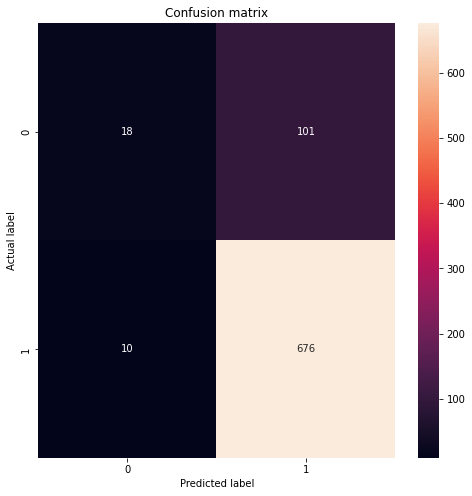

In [ ]:
test_predictions_baseline = model.predict(test_features)
plot_cm(test_labels, test_predictions_baseline)
# 0 is 'alive', 1 is 'not alive'